In [65]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## (a) (1 point) Split the dataset to training set and test set using the ratio training set : test set = 7 : 3. The utility model_selection.train_test_split can be used to split the dataset.

In [66]:
dataset = pd.read_csv('uber_usage.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [67]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [68]:
dataset.count()

CustomerID      400
Gender          400
Age             400
AnnualSalary    400
RegularRider    400
dtype: int64

In [69]:
dataset.head()

,CustomerID,Gender,Age,AnnualSalary,RegularRider
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [70]:
dataset.describe()

,CustomerID,Age,AnnualSalary,RegularRider
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [71]:
dataset['RegularRider'].unique()

array([0, 1])

## Split the dataset to training set and test set using the ratio training set : test set = 7 : 3.

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [73]:
print len(X_train), len(X_test), len(y_train), len(y_test)

280 120 280 120


In [74]:
print X_train

[[    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  80000]
 [    46 117000]
 [    35  61000]
 [    21  68000]
 [    28  44000]
 [    41  87000]
 [    37  33000]
 [    27  90000]
 [    39  42000]
 [    28 123000]
 [    31 118000]
 [    25  87000]
 [    35  71000]
 [    37  70000]
 [    35  39000]
 [    47  23000]
 [    35 147000]
 [    48 138000]
 [    26  86000]
 [    25  79000]
 [    52 13800

## (b) (1 point) Use scikit-learn's StandardScaler, fit and transform each feature (age, annual salary) into a standard normal distribution. Then use the same parameters of the distributions to transform the test set.

In [75]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
print X_train

[[-1.1631724  -1.5849703 ]
 [ 2.17018137  0.93098672]
 [ 0.0133054   1.22017719]
 [ 0.20938504  1.07558195]
 [ 0.40546467 -0.48604654]
 [-0.28081405 -0.31253226]
 [ 0.99370357 -0.8330751 ]
 [ 0.99370357  1.8563962 ]
 [ 0.0133054   1.24909623]
 [-0.86905295  2.26126285]
 [-1.1631724  -1.5849703 ]
 [ 2.17018137 -0.80415605]
 [-1.35925203 -1.46929411]
 [ 0.40546467  2.2901819 ]
 [ 0.79762394  0.75747245]
 [-0.96709276 -0.31253226]
 [ 0.11134522  0.75747245]
 [-0.96709276  0.55503912]
 [ 0.30742485  0.06341534]
 [ 0.69958412 -1.26686079]
 [-0.47689368 -0.0233418 ]
 [-1.7514113   0.3526058 ]
 [-0.67297331  0.12125343]
 [ 0.40546467  0.29476771]
 [-0.28081405  0.06341534]
 [-0.47689368  2.2901819 ]
 [ 0.20938504  0.03449629]
 [ 1.28782302  2.20342476]
 [ 0.79762394  0.26584866]
 [-0.28081405  0.15017248]
 [ 0.0133054  -0.54388463]
 [-0.18277423  0.15017248]
 [-0.08473441  0.23692961]
 [ 0.0133054  -0.25469417]
 [ 2.17018137  1.104501  ]
 [-1.7514113   0.3526058 ]
 [ 1.87606192  0.12125343]
 

In [77]:
print X_test

[[-0.77101313  0.49720103]
 [ 0.0133054  -0.57280368]
 [-0.28081405  0.15017248]
 [-0.77101313  0.26584866]
 [-0.28081405 -0.57280368]
 [-1.06513258 -1.44037507]
 [-0.67297331 -1.5849703 ]
 [-0.18277423  2.14558666]
 [-1.94749093 -0.05226085]
 [ 0.89566375 -0.775237  ]
 [-0.77101313 -0.60172273]
 [-0.96709276 -0.42820845]
 [-0.08473441 -0.42820845]
 [ 0.11134522  0.20801057]
 [-1.7514113   0.46828198]
 [-0.5749335   1.36477242]
 [-0.08473441  0.20801057]
 [-1.84945111  0.43936294]
 [ 1.67998229  1.74072002]
 [-0.28081405 -1.38253697]
 [-0.28081405 -0.65956082]
 [ 0.89566375  2.14558666]
 [ 0.30742485 -0.54388463]
 [ 0.89566375  1.01774386]
 [-1.45729185 -1.2090227 ]
 [ 1.09174339  2.05882953]
 [-0.96709276  0.49720103]
 [-0.86905295  0.29476771]
 [-0.08473441 -0.22577513]
 [-0.5749335   0.46828198]
 [-1.65337148  0.52612008]
 [-0.08473441  0.26584866]
 [ 1.87606192 -0.28361322]
 [-0.08473441 -0.48604654]
 [-1.35925203 -0.34145131]
 [-1.94749093 -0.51496559]
 [-1.55533166  0.32368675]
 

In [78]:
np.mean(X_train[:, 1])

5.709718412357947e-17

In [79]:
np.mean(X_train[:, 0])

2.5376526277146434e-17

In [80]:
np.var(X_train)

1.0

## (c) (2 points) Use scikit-learn's Logistic Regression model linear_model.LogisticRegression to train a model on the training set and apply it to the test set.

In [81]:
# Fitting a Logistic Regression model to the training set
classifier = LogisticRegression(solver = 'liblinear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting y and probabilities for the train set
y_train_pred = classifier.predict(X_train)
# Probabilities will be given for 0 and 1; we only need those for the positive class (1) to calculate AUC 
y_train_probs = classifier.predict_proba(X_train)[:, 1]

# Predicting y and probabilities for the test set
y_test_pred = classifier.predict(X_test)
# Probabilities
y_test_probs = classifier.predict_proba(X_test)[:, 1]

## (d) (4 points) Calculate the TP rate, FP rate, FN rate, Precision, Recall, F1 score, and AUC on the training set and test set. Compare the AUC on the  training set and test set.

In [82]:
def calculate_part_b(y_true, y_pred, y_prob):
    """ We use this function to calculate TP rate, FP rate, FN rate, Precision, Recall, F1 score, and AUC given 
    y_true: array of ground truth (correct) target values 
    y_pred: array of predicted target values 
    y_prob: array of predicted probability of positive class (1)"""

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    # True Negative, False Positive, False Negative, True Positive
    tn, fp, fn, tp = cm.ravel()

    # Number of positive cases in the ground truth    
    p = float(tp + fn)
    # Number of negative cases in the ground truth
    n = float(fp + tn)
    
    # TP rate 
    tp_rate = tp / p

    # FP rate 
    fp_rate = fp / n
    
    # FN rate
    fn_rate = fn / p
    
    prec = tp / float(tp + fp)
    recall = tp_rate
    
    f1_score = 2.0*prec*recall/(prec + recall)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr)

    auc = roc_auc_score(y_true=y_true, y_score=y_prob)
        
    return tp_rate, fp_rate, fn_rate, prec, recall, f1_score, auc


### On the training set

0.696078431372549 0.08426966292134831 0.30392156862745096 0.8255813953488372 0.696078431372549 0.7553191489361702 0.9169971359330248


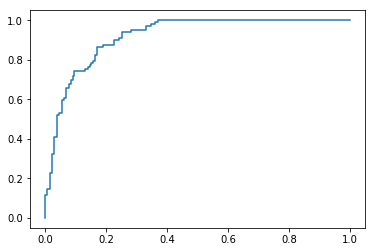

In [83]:
# Calculate the parameters on the train set
tp_rate_train, fp_rate_train, fn_rate_train, prec_train, recall_train, f1_score_train, auc_train \
                = calculate_part_b(y_train, y_train_pred, y_train_probs)
print tp_rate_train, fp_rate_train, fn_rate_train, prec_train, recall_train, f1_score_train, auc_train


### On the test set

0.7560975609756098 0.06329113924050633 0.24390243902439024 0.8611111111111112 0.7560975609756098 0.8051948051948052 0.9468971904908923


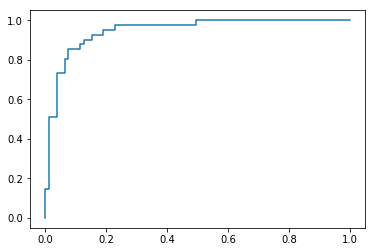

In [84]:
# Calculate the parameters on the test set
tp_rate_test, fp_rate_test, fn_rate_test, prec_test, recall_test, f1_score_test, auc_test \
                = calculate_part_b(y_test, y_test_pred, y_test_probs)
print tp_rate_test, fp_rate_test, fn_rate_test, prec_test, recall_test, f1_score_test, auc_test

#### AUC on the training set: 0.917, AUC on the test set 0.947
#### AUC_test > AUC_train 

## (e) (2 point) Visualize the feature values and labels of the training set using a scatter plot. Visualize the feature values and decisions on another scatter plot.  
### Notes: Can use the original values or standardized values for age and salary

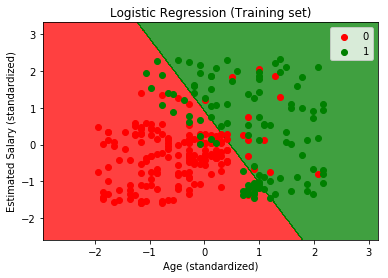

In [85]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age (standardized)')
plt.ylabel('Estimated Salary (standardized)')
plt.legend()
plt.show()

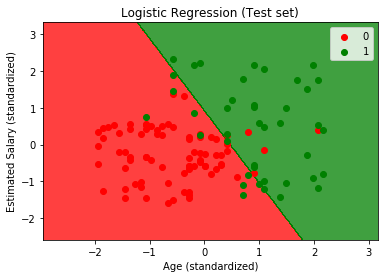

In [86]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age (standardized)')
plt.ylabel('Estimated Salary (standardized)')
plt.legend()
plt.show()